In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
#pio.templates.default = "plotly_white"

pd.set_option('display.max_columns', 100)

## Clients

In [2]:
df1 = pd.read_csv("data/Client_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df1.head()

,ÿSalonID,ClientID,FirstName,LastName,Address,City,State,Zip,HomePhone,WorkPhone,Sex,DOB,Anniversary,EMail,Referral,Mailing,Spl_instruction,Total_Visits,Refer_ID,Refer_Name,Balance,Std_Discount,SkinType,HairType,PhotoPath,TimeMark,RowNo,Status,Comment,Client_History,Spl_instruction_desc,Balance_Comment,Skin_desc,Hair_desc,PrivelageCardNo,Privelage_Check,OpeningPoints,ServiceProvider,MostFrequentService,PrivelageTiming,MostFrequentService1,LoyaltyMemberShip_Date,category,sapkey,Create_Date,survey,member_check,MembershipCardNo,Membership_Date,Membership_expiryDate,chksms,Studio_Client,add_on_card,addoncreated_Date,PhotoPath2,CustomerGSTNO,Walletcardno,Walletcheck,mem_card_oth_outlets
0,907,..8220484146,Shankar,NaN,NaN,NaN,NaN,NaN,8220484146,NaN,M,2021-12-27 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2023-10-28 16:15:16.567,63966.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-8220484146,2021-12-27 10:18:52.067,Banners,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
1,907,.8393863665,shubh,NaN,NaN,NaN,NaN,NaN,8393863665,NaN,M,2022-03-02 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2022-03-02 20:32:23.213,64298.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-8393863665,2022-03-02 19:23:29.423,Banners,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
2,907,.9894384197,Rafi,rufi9888800870,NaN,NaN,NaN,NaN,9894384197,NaN,M,2022-10-05 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2023-08-04 17:55:13.310,70781.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0,NaN,1990-01-01 00:00:00.000,Loyal 1,.907-9894384197,2022-10-05 16:58:38.060,EXISTING CLIENTS,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,0,NaN,NaN,NaN
3,907,.C Balachander9884886817,.C Balachander,NaN,NaN,NaN,NaN,NaN,9884886817,NaN,M,2007-05-03 00:00:00.000,1753-01-01 00:00:00.000,NaN,0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nopicture,2022-04-08 15:25:22.833,37373.0,U,NaN,NaN,00149387,NaN,NaN,NaN,NaN,0.0,NaN,SENTHIL,NaN,0,NaN,1990-01-01 00:00:00.000,Walkin 1,.907-9884886817,2014-11-12 12:50:32.350,Others,0.0,NaN,1990-01-01 00:00:00.000,1990-01-01 00:00:00.000,1.0,0.0,NaN,NaN,nopicture,NaN,NaN,NaN,NaN
4,907,0,Walkin,-Customer,NaN,NaN,NaN,NaN,154,NaN,M,1753-01-01 00:00:00.000,1753-01-01 00:00:00.000,NaN,NaN,NaN,0.0,0.0,0,NaN,0.0,0.0,NaN,NaN,nopicture,2020-03-21 15:28:48.347,2.0,U,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,W105-0000080154,NaN,EXISTING CLIENTS,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,nopicture,NaN,NaN,NaN,NaN


In [3]:
df1.describe()

,City,State,WorkPhone,Spl_instruction,Total_Visits,Balance,Std_Discount,SkinType,HairType,RowNo,Comment,Client_History,Balance_Comment,Skin_desc,Hair_desc,PrivelageCardNo,Privelage_Check,OpeningPoints,member_check,chksms,Studio_Client,add_on_card,addoncreated_Date,Walletcheck,mem_card_oth_outlets
count,30.0,0.0,1.180000e+02,26732.000000,1.100000e+01,31.000000,31.0,0.0,0.0,26702.000000,4.000000e+00,0.0,0.0,0.0,0.0,2.0,26671.0,0.0,26672.000000,26672.000000,26672.0,0.0,0.0,16.0,2.605000e+03
mean,0.0,NaN,6.423571e+09,0.146491,7.043405e+05,0.967742,0.0,NaN,NaN,49035.712756,4.516615e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.232304,0.998875,0.0,NaN,NaN,1.0,2.165291e+06
std,0.0,NaN,4.211900e+09,0.353604,4.210434e+05,0.179605,0.0,NaN,NaN,13260.879879,4.408732e+05,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.422309,0.033519,0.0,NaN,NaN,0.0,8.453795e+06
min,0.0,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000,0.0,NaN,NaN,2.000000,1.425770e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,0.000000,0.0,NaN,NaN,1.0,0.000000e+00
25%,0.0,NaN,3.020775e+04,0.000000,4.963250e+05,1.000000,0.0,NaN,NaN,39308.250000,1.569770e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,2.140460e+05
50%,0.0,NaN,8.939469e+09,0.000000,5.851230e+05,1.000000,0.0,NaN,NaN,45986.500000,2.890700e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,6.340980e+05
75%,0.0,NaN,9.665945e+09,0.000000,1.014850e+06,1.000000,0.0,NaN,NaN,52673.750000,5.837545e+05,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,0.000000,1.000000,0.0,NaN,NaN,1.0,1.248520e+06
max,0.0,NaN,9.995264e+09,1.000000,1.376456e+06,1.000000,0.0,NaN,NaN,86316.000000,1.085929e+06,NaN,NaN,NaN,NaN,3001.0,0.0,NaN,1.000000,1.000000,0.0,NaN,NaN,1.0,9.952948e+07


## Employees

In [4]:
df2 = pd.read_csv("data/Employee_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df2.head()

,ÿSalonID,EmpID,FirstName,LastName,Address,City,State,Zip,HomePhone,WorkPhone,Mobile,Sex,DOB,Areaofspecialisation,SSN,EMail,Pwd,ShowOnApp,ShowOnSch,AppBookOrder,ShedulingOrder,deactivate,inter,TimeMark,RowNo,Status,Search,doh,EmpAtt
0,907,12751,HABIBUL RAHMAN,12751.0,_,NaN,NaN,NaN,0,0,0,M,1900-01-01 00:00:00.000,HAIR & BEAUTY,NaN,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.030,628.0,U,NaN,2015-03-01 00:00:00.000,0.0
1,907,401367,MADHAN,401367.0,",",NaN,NaN,NaN,NaN,8681840558,8681840558,M,1992-05-30 00:00:00.000,HAIR & BEAUTY,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,614.0,U,NaN,2014-01-01 00:00:00.000,0.0
2,907,402193,SHAMSUDDEEN,402193.0,_,NaN,NaN,NaN,NaN,0,0,M,2013-06-03 00:00:00.000,HAIR & BEAUTY,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,593.0,U,NaN,2013-08-28 00:00:00.000,0.0
3,907,402194,SURAJ GURUNG,402194.0,_,NaN,NaN,NaN,NaN,8939344586,8939344586,M,2013-07-29 00:00:00.000,BEAUTICIAN,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.027,594.0,U,NaN,2013-08-28 00:00:00.000,0.0
4,907,402195,DIPENGIRI,402195.0,_,NaN,NaN,NaN,NaN,9176741589,9176741589,M,2013-08-14 00:00:00.000,STYLIST,Permanent,NaN,NaN,NaN,NaN,0,0.0,1,0.0,2018-09-26 15:29:06.023,595.0,U,NaN,2013-08-28 00:00:00.000,0.0


## Service Sales

In [5]:
df3 = pd.read_csv("data/Ticket_Product_Details_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df3.head()

,ÿSalonID,TicketID,ProdID,EmpID,Type,Descr,Qty,Tax,BackBar,Retail_Price,Discount_Amt,Discount_Perct,Total,Start_Time,wid,bomreference,TimeMark,RowNo,Status,Billformat,luxurytax,Studio_Status,Mem_Disc,Oth_Disc,Created_Date2
0,907,1,GHHCUTNR,9079999.0,S,HAIRCUT (GENTS),1.0,12.36,NaN,130.0,0.0,0,146.07,27-08-2013 18:12,501,NaN,43:59.0,205478.0,U,D,0.0,N,0.0,0.0,00:00.0
1,907,2,LHHCUTAD,9079999.0,S,"HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)",1.0,12.36,NaN,400.0,0.0,0,449.44,28-08-2013 10:50,502,NaN,43:59.0,205479.0,U,D,0.0,N,0.0,0.0,00:00.0
2,907,2,LSTHDGEB,9079999.0,S,THREADING - EYEBROWS (LADIES),1.0,12.36,NaN,25.0,0.0,0,28.09,28-08-2013 10:50,502,NaN,43:59.0,205480.0,U,D,0.0,N,0.0,0.0,00:00.0
3,907,3,LBMANIFR,9079999.0,S,MANICURE - FRENCH (LADIES),1.0,12.36,NaN,260.0,0.0,0,292.14,28-08-2013 10:54,502,NaN,43:59.0,205482.0,U,D,0.0,N,0.0,0.0,00:00.0
4,907,3,LSTHDGEB,9079999.0,S,THREADING - EYEBROWS (LADIES),1.0,12.36,NaN,25.0,0.0,0,28.09,28-08-2013 10:53,502,NaN,43:59.0,205481.0,U,D,0.0,N,0.0,0.0,00:00.0


In [6]:
df3.describe()

,TicketID,EmpID,Qty,Tax,Retail_Price,Discount_Amt,Total,bomreference,RowNo,luxurytax,Mem_Disc,Oth_Disc
count,290856.000000,2.887600e+05,288760.000000,288760.00000,288760.000000,286664.000000,288760.000000,2113.0,288760.000000,286664.0,286664.000000,286664.000000
mean,73287.731826,1.131305e+06,1.024990,17.15180,348.519252,50.640623,4290.676384,0.0,353845.174522,0.0,41.859250,6.492284
std,41613.854744,2.118174e+06,0.483829,19.83383,642.896567,117.391441,46058.112617,0.0,99347.945814,0.0,98.779606,57.881897
min,1.000000,0.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-240.000000
25%,37144.750000,4.100190e+05,1.000000,14.00000,55.000000,5.000000,59.000000,0.0,275640.750000,0.0,0.000000,0.000000
50%,74705.500000,4.126340e+05,1.000000,18.00000,150.000000,15.000000,147.500000,0.0,347830.500000,0.0,15.000000,0.000000
75%,112211.000000,9.019110e+05,1.000000,18.00000,280.000000,35.000000,295.000000,0.0,420020.250000,0.0,35.000000,0.000000
max,140155.000000,9.079999e+06,35.000000,3245.00000,20199.000000,4632.000000,564016.000000,0.0,564055.000000,0.0,2875.000000,4625.000000


In [7]:
df4 = pd.read_csv("data/Tickets_14Nov23_4pm.csv", encoding='ISO-8859-1', low_memory=False)
df4.head()

,ÿSalonID,TicketID,ClientID,SchDate,Referral,Total,Created_Date,Total_WithoutTax,printed,bomreferenceindex,TimeMark,RowNo,Status,Serviceslipno,servicedesc,BillStatus
0,907,1,JERRY9940060569,2013-08-27 00:00:00.000,Request,146.07,2013-08-27 00:00:00.000,130.0,0.0,NaN,2013-08-27 18:13:22.023,108263.0,i,1111111.0,HAIRCUT (GENTS),Closed
1,907,2,Saranya9884402095,2013-08-28 00:00:00.000,Request,477.53,2013-08-28 00:00:00.000,425.0,0.0,NaN,2013-08-28 10:52:27.833,108264.0,i,111112.0,"HAIRCUT LADIES ADVANCED(LAYER,MUSHROOM,WEDGE)/...",Closed
2,907,3,Lakshmi rajkumar9176222704,2013-08-28 00:00:00.000,Request,320.23,2013-08-28 00:00:00.000,285.0,0.0,NaN,2013-08-28 10:55:35.253,108265.0,i,111113.0,THREADING - EYEBROWS (LADIES)/MANICURE - FRENC...,Closed
3,907,4,Vaishali8056111666,2013-08-28 00:00:00.000,Request,56.18,2013-08-28 00:00:00.000,50.0,0.0,NaN,2013-08-28 10:57:18.620,108266.0,i,111114.0,THREADING - EYEBROWS (LADIES)/THREADING - UPPE...,Closed
4,907,5,Sudeep9381057770,2013-08-28 00:00:00.000,Request,95.51,2013-08-28 00:00:00.000,85.0,0.0,NaN,2013-08-28 10:58:54.560,108267.0,i,111115.0,KIDS CUT - BELOW 10 YEARS - WEEK DAYS (GENTS),Closed


# Customer Segmentation

### RFM Analysis

By creating segments, businesses can tailor their marketing efforts, product offerings, and customer service experiences to better meet the specific needs of each segment.

Questions:
- Who are frequent customers?
- Who are recent (new) customers?
- Who are high-paying customers
- What are the services purchased by the 3 groups?

### Total Transactions per Customer

1. Sum number of services taken by customer

In [8]:
# Try to convert the 'column_name' to int64, handling errors
try:
    df4['TicketID'] = df4['TicketID'].astype('int64')
except ValueError:
    # Handle non-numeric values, for example, replacing them with NaN
    df4['TicketID'] = pd.to_numeric(df4['TicketID'], errors='coerce')

#print(df4.dtypes)

In [9]:
df3['NumServices'] = df3.groupby('TicketID')['TicketID'].transform('count')

In [10]:
# Selecting specific columns from each DataFrame
df3_subset = df3[['TicketID', 'NumServices']]
df4_subset = df4[['TicketID', 'ClientID', 'Total']]

# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(df3_subset, df4_subset, on='TicketID', how='right')

In [11]:
sales_df = sales_df.drop_duplicates(subset=['TicketID'])
len(sales_df)

140156

In [12]:
sales_df.sample(4)

,TicketID,NumServices,ClientID,Total
254365,125404.0,2.0,rahul9840354322,277.3
282383,135954.0,2.0,nivetha7373919089,1132.8
51817,25997.0,1.0,Balachandran9940533390,100.0
271870,131887.0,1.0,Sampath9842893956,177.0


In [13]:
sales_df = sales_df[sales_df['ClientID'] != "0"]
len(sales_df)

139669

In [14]:
sales_df = sales_df.groupby('ClientID').agg({'NumServices': 'sum', 'Total': 'sum'}).reset_index()
sales_df.rename(columns={'Total': 'total_spending'}, inplace=True)
sales_df.sample(4)

,ClientID,NumServices,total_spending
2850,Gayathri9551636684,1.0,33.71
13346,ashish7077102679,6.0,1734.60
24847,umapathynathan9994499211,4.0,525.10
15184,gokul8144321378,1.0,306.80


In [15]:
sales_df.describe()

,NumServices,total_spending
count,26043.000000,26043.000000
mean,11.142879,3915.547452
std,27.744987,10634.124009
min,1.000000,0.000000
25%,2.000000,277.300000
50%,4.000000,1003.000000
75%,9.000000,3497.510000
max,2065.000000,435922.100000


In [16]:
current_date = datetime.now()
df1['DOB'] = pd.to_datetime(df1['DOB'])
df1['age'] = np.floor((current_date - df1['DOB']).dt.days / 365.25)

In [17]:
df1_subset = df1[['ClientID', 'Sex', 'age', 'HomePhone']]
df1_subset

,ClientID,Sex,age,HomePhone
0,..8220484146,M,2.0,8220484146
1,.8393863665,M,1.0,8393863665
2,.9894384197,M,1.0,9894384197
3,.C Balachander9884886817,M,16.0,9884886817
4,0,M,270.0,154
...,...,...,...,...
26729,Zion9500109746,F,16.0,9500109746
26730,ZOHARA9150721951,F,11.0,9150721951
26731,ztya9884450626,M,5.0,9884450626
26732,zubair8220237654,M,4.0,8220237654


In [18]:
# Performing an inner merge based on the common column 'customer_id'
sales_df = pd.merge(sales_df, df1_subset, on='ClientID', how='left')
len(sales_df)

26043

In [19]:
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone
0,..8220484146,4.0,4425.90,M,2.0,8220484146
1,.8393863665,3.0,495.60,M,1.0,8393863665
2,.9894384197,18.0,7776.20,M,1.0,9894384197
3,.C Balachander9884886817,11.0,3250.73,M,16.0,9884886817
4,A Velu9556186556,1.0,189.75,M,6.0,9556186556
...,...,...,...,...,...,...
26038,ziaulhAQ9943699607,4.0,736.00,M,7.0,9943699607
26039,zil7373165752,13.0,1917.50,M,4.0,7373165752
26040,ztya9884450626,1.0,212.40,M,5.0,9884450626
26041,zubair8220237654,4.0,3256.80,M,4.0,8220237654


In [20]:
selected_columns = ["NumServices", "age", "total_spending", "age"]
correlation_matrix = sales_df[selected_columns].corr().round(2)
correlation_matrix

,NumServices,age,total_spending,age
NumServices,1.00,0.18,0.72,0.18
age,0.18,1.00,0.11,1.00
total_spending,0.72,0.11,1.00,0.11
age,0.18,1.00,0.11,1.00


<Axes: >

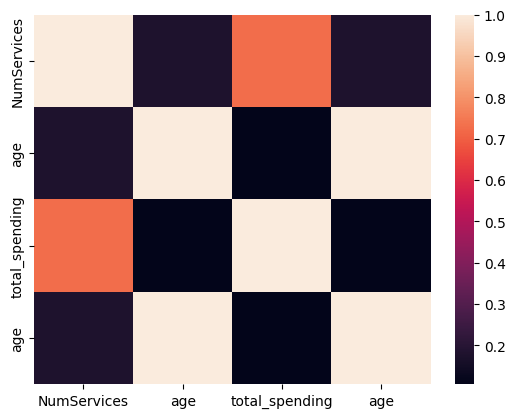

In [21]:
sns.heatmap(sales_df[selected_columns].corr())

In [22]:
grouped = sales_df.groupby('Sex')['total_spending'].median()
grouped

Sex
F    1233.10
M     855.50
f    1112.00
m    1060.82
Name: total_spending, dtype: float64

In [23]:
sales_df['Sex'] = sales_df['Sex'].apply(lambda x: str(x).upper())

In [24]:
# Drop rows where 'Sex' is NaN
sales_df['Sex'] = sales_df['Sex'].replace("NAN", np.nan)
sales_df_filtered = sales_df[sales_df['Sex'].notna()]

# Group by 'Sex' and calculate the median total spending
grouped = sales_df_filtered.groupby('Sex')['total_spending'].median()
grouped

Sex
F    1232.51
M     855.50
Name: total_spending, dtype: float64

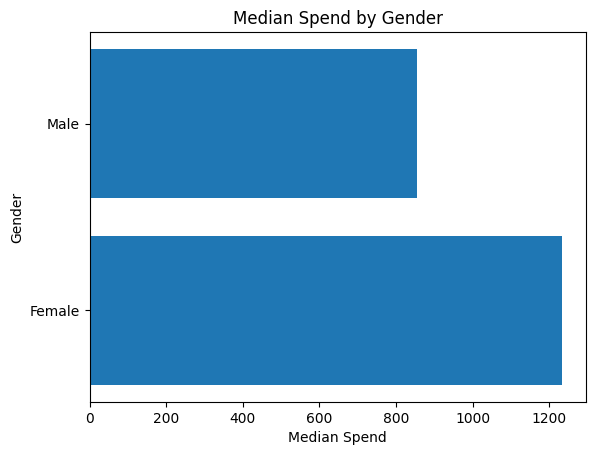

In [25]:
gender_labels = {
    "F": 'Female',
    "M": 'Male'
}

plt.barh([gender_labels[x] for x in grouped.index], grouped.values)

plt.xlabel('Median Spend')
plt.ylabel('Gender')
plt.title('Median Spend by Gender')

plt.show()

#### Calculating Recency, Frequency and Monetory

In [26]:
df4['Created_Date'] = pd.to_datetime(df4['Created_Date'])
df4['Created_Date'].max()

Timestamp('2023-11-14 00:00:00')

In [27]:
cutoff_date = df4['Created_Date'].max()

# Calculate recency
df4['Recency'] = (cutoff_date - df4.groupby('ClientID')['Created_Date'].transform('max')).dt.days

In [28]:
recency_df = df4[['ClientID', 'Recency']]

In [29]:
sales_df = pd.merge(sales_df, recency_df, on='ClientID', how='left')
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency
0,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0
1,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0
2,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0
3,.8393863665,3.0,495.6,M,1.0,8393863665,622.0
4,.9894384197,18.0,7776.2,M,1.0,9894384197,144.0
...,...,...,...,...,...,...,...
139663,zil7373165752,13.0,1917.5,M,4.0,7373165752,709.0
139664,ztya9884450626,1.0,212.4,M,5.0,9884450626,1916.0
139665,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0
139666,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0


In [30]:
sales_df["Monetary"] = sales_df["total_spending"]
sales_df["Frequency"] = sales_df["NumServices"]
sales_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency
0,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0,4425.9,4.0
1,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0,4425.9,4.0
2,..8220484146,4.0,4425.9,M,2.0,8220484146,17.0,4425.9,4.0
3,.8393863665,3.0,495.6,M,1.0,8393863665,622.0,495.6,3.0
4,.9894384197,18.0,7776.2,M,1.0,9894384197,144.0,7776.2,18.0
...,...,...,...,...,...,...,...,...,...
139663,zil7373165752,13.0,1917.5,M,4.0,7373165752,709.0,1917.5,13.0
139664,ztya9884450626,1.0,212.4,M,5.0,9884450626,1916.0,212.4,1.0
139665,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0,3256.8,4.0
139666,zubair8220237654,4.0,3256.8,M,4.0,8220237654,1632.0,3256.8,4.0


In [31]:
sales_df = sales_df.drop_duplicates()
len(sales_df)

26043

In [34]:
sales_df['RecencyScore'] = pd.qcut (sales_df['Recency'], q = 5, labels = ['5', '4', '3', '2', '1'])
sales_df['FrequencyScore'] = pd.qcut (sales_df['Frequency'], q = 5, labels = ['1', '2', '3', '4', '5'])
sales_df['MonetaryScore'] = pd.qcut (sales_df['Monetary'], q = 5, labels = ['1', '2', '3', '4', '5'])

/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_11603/2337130071.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['RecencyScore'] = pd.qcut (sales_df['Recency'], q = 5, labels = ['5', '4', '3', '2', '1'])
/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipykernel_11603/2337130071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_df['FrequencyScore'] = pd.qcut (sales_df['Frequency'], q = 5, labels = ['1', '2', '3', '4', '5'])
/var/folders/99/dvbkl7kn2v5368qtns4pm2fw0000gn/T/ipy

In [35]:
#scaler = MinMaxScaler()
#sales_df['RecencyScore'] = scaler.fit_transform(sales_df[['Recency']])
#sales_df['FrequencyScore'] = scaler.fit_transform(sales_df[['Frequency']])
#sales_df['MonetaryScore'] = scaler.fit_transform(sales_df[['Monetary']])

sales_df.sample(4)

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore
26470,L.shanthi7401231236,29.0,7160.69,F,270.0,7401231236,2381.0,7160.69,29.0,2,5,5
50812,SATHYA9962716250,1.0,149.50,M,16.0,9962716250,2702.0,149.50,1.0,2,1,1
2431,Abilash8138806099,44.0,7805.70,M,2.0,8138806099,17.0,7805.70,44.0,5,5,5
62805,Suresh moorthy8939018928,2.0,477.90,M,2.0,8939018928,738.0,477.90,2.0,4,1,2


In [40]:
sales_df.loc[:, 'RFM_score'] = sales_df['RecencyScore'].astype(int) + sales_df['MonetaryScore'].astype(int) + sales_df['FrequencyScore'].astype(int)
sales_df.sample(3) 

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment
94267,kayal9597697574,3.0,831.90,F,4.0,9597697574,1690.0,831.90,3.0,3,2,3,8,Mid-Value
59503,Smitha9840327754,29.0,9478.33,F,270.0,9840327754,2817.0,9478.33,29.0,2,5,5,12,High-Value
45922,Ram9445375740,5.0,702.10,M,2.0,9445375740,842.0,702.10,5.0,4,3,3,10,Mid-Value


In [39]:
segment_labels = ["Low_Value", "Mid-Value", "High-Value"]
sales_df.loc[:, "Value Segment"] = pd.qcut(sales_df["RFM_score"], q=3, labels=segment_labels)

In [41]:
sales_df.sample(3)

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment
51445,SHARMILA7708877787,4.0,532.35,F,16.0,7708877787,960.0,532.35,4.0,4,3,2,9,Mid-Value
128169,suba9444472123,2.0,1150.50,M,3.0,9444472123,1388.0,1150.50,2.0,4,1,3,8,Mid-Value
57452,Shalini7338830345,32.0,12247.22,F,5.0,7338830345,1815.0,12247.22,32.0,3,5,5,13,High-Value


In [42]:
sales_df['RFM_score'].describe()

count    26043.000000
mean         8.706447
std          3.488628
min          3.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         15.000000
Name: RFM_score, dtype: float64

In [45]:
sales_df.loc[:, "RFM Customer Segments"] = ""

sales_df.loc[sales_df.loc[:, "RFM_score"] >= 9, "RFM Customer Segments"] = "Champions"
sales_df.loc[(sales_df.loc[:, "RFM_score"] >= 6) & (sales_df["RFM_score"] < 9), "RFM Customer Segments"] = "Potential Loyalists"
sales_df.loc[(sales_df.loc[:, 'RFM_score'] >= 4) & (sales_df['RFM_score'] <6), 'RFM Customer Segments'] = "Can't Lose"
sales_df.loc[(sales_df.loc[:, 'RFM_score'] < 4), 'RFM Customer Segments'] = "Lost"

# Print the updated data with RFM segments
sales_df.sample(3)

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
116604,sahir9003474610,2.0,310.5,M,6.0,9003474610,2461.0,310.5,2.0,2,1,2,5,Low_Value,Can't Lose
81611,dhanya7338888643,4.0,879.1,F,270.0,7338888643,2171.0,879.1,4.0,2,3,3,8,Mid-Value,Potential Loyalists
255,AJITH9884173066,7.0,5451.6,M,5.0,9884173066,1840.0,5451.6,7.0,3,4,5,12,High-Value,Champions


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


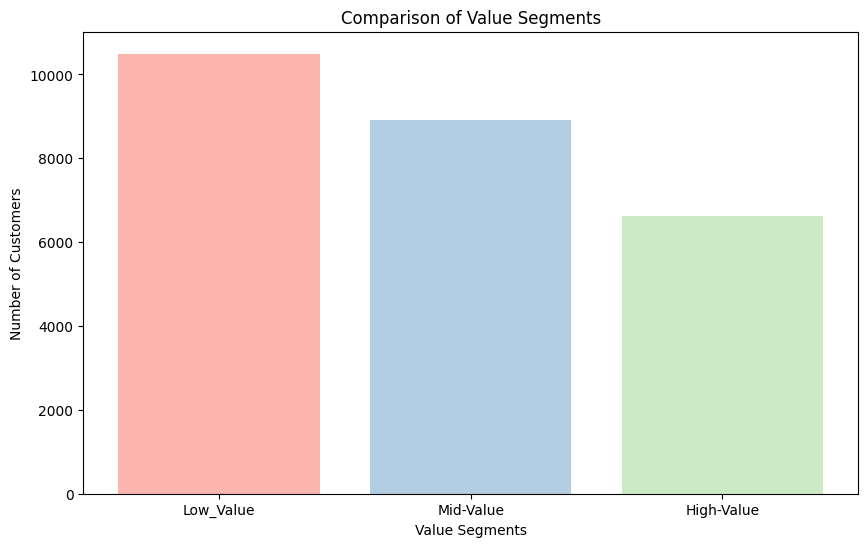

In [46]:
# Assuming you have a DataFrame named sales_df
segment_counts = sales_df['Value Segment'].value_counts()

# Define pastel colors
pastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))

# Set the color for the 'Champions' segment
champions_color = (158/255, 202/255, 225/255)  # RGB values

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)

# Set the color for the 'Champions' segment
for bar, segment in zip(bars, segment_counts.index):
    if segment == 'Champions':
        bar.set_color(champions_color)

# Set labels and title
plt.title('Comparison of Value Segments')
plt.xlabel('Value Segments')
plt.ylabel('Number of Customers')

# Hide the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


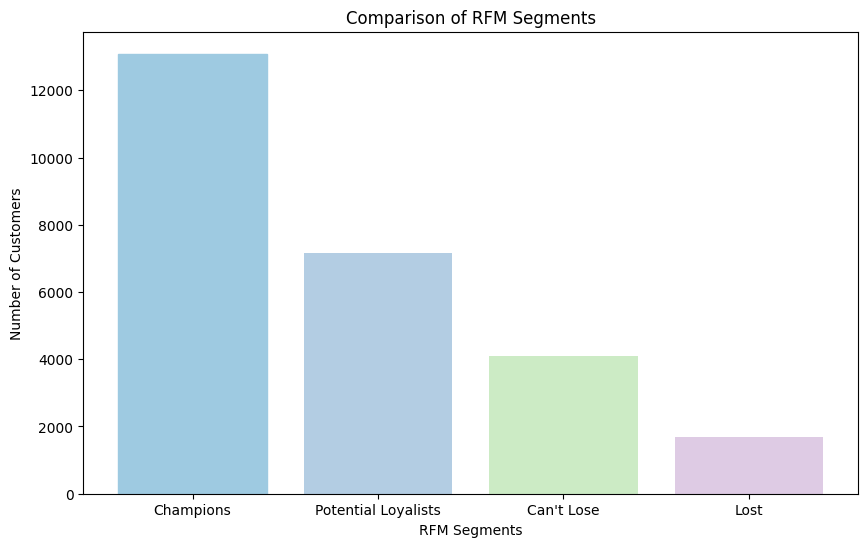

In [47]:
# Assuming you have a DataFrame named sales_df
segment_counts = sales_df['RFM Customer Segments'].value_counts()

# Define pastel colors
pastel_colors = plt.cm.Pastel1(np.arange(len(segment_counts)))

# Set the color for the 'Champions' segment
champions_color = (158/255, 202/255, 225/255)  # RGB values

# Create a bar chart with custom colors
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_counts.index, segment_counts.values, color=pastel_colors)

# Set the color for the 'Champions' segment
for bar, segment in zip(bars, segment_counts.index):
    if segment == 'Champions':
        bar.set_color(champions_color)

# Set labels and title
plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

# Hide the legend
plt.legend().set_visible(False)

# Show the plot
plt.show()

In [48]:
# Assuming you have a DataFrame named sales_df
segment_scores = sales_df.groupby('RFM Customer Segments')[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].mean().reset_index()

# Define colors
colors = [(158/255, 202/255, 225/255), (94/255, 158/255, 217/255), (32/255, 102/255, 148/255)]

# Create a bar chart with Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.25
bar_positions = np.arange(len(segment_scores['RFM Customer Segments']))

ax.bar(bar_positions - bar_width, segment_scores['RecencyScore'], bar_width, label='Recency Score', color=colors[0])
ax.bar(bar_positions, segment_scores['FrequencyScore'], bar_width, label='Frequency Score', color=colors[1])
ax.bar(bar_positions + bar_width, segment_scores['MonetaryScore'], bar_width, label='Monetary Score', color=colors[2])

# Set labels and title
ax.set_title('Comparison of RFM Segments based on Recency, Frequency, and Monetary Scores')
ax.set_xlabel('RFM Segments')
ax.set_ylabel('Score')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(segment_scores['RFM Customer Segments'])

# Show legend
ax.legend()

# Show the plot
plt.show()

TypeError: category dtype does not support aggregation 'mean'

In [49]:
champions_df = sales_df[sales_df['RFM Customer Segments'] == 'Champions']
champions_df.to_csv("outputs/champions.csv")
champions_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
0,..8220484146,4.0,4425.90,M,2.0,8220484146,17.0,4425.90,4.0,5,3,4,12,High-Value,Champions
4,.9894384197,18.0,7776.20,M,1.0,9894384197,144.0,7776.20,18.0,5,5,5,15,High-Value,Champions
11,.C Balachander9884886817,11.0,3250.73,M,16.0,9884886817,732.0,3250.73,11.0,4,4,4,12,High-Value,Champions
18,A. Vijaya Ragava Boo8754418338,57.0,7728.40,M,16.0,8754418338,1368.0,7728.40,57.0,4,5,5,14,High-Value,Champions
49,AADHI8220484602,5.0,389.40,M,1.0,8220484602,387.0,389.40,5.0,5,3,2,10,Mid-Value,Champions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139646,yuvraja7092316226,3.0,631.30,M,3.0,7092316226,1337.0,631.30,3.0,4,2,3,9,Mid-Value,Champions
139648,zahir 9790659759,10.0,8810.13,M,1.0,9790659759,114.0,8810.13,10.0,5,4,5,14,High-Value,Champions
139652,zahir9677994532,4.0,3245.00,M,11.0,9677994532,385.0,3245.00,4.0,5,3,4,12,High-Value,Champions
139657,zil7373165752,13.0,1917.50,M,4.0,7373165752,709.0,1917.50,13.0,4,5,4,13,High-Value,Champions


In [50]:
potloyalists_df = sales_df[sales_df['RFM Customer Segments'] == 'Potential Loyalists']
potloyalists_df.to_csv("outputs/potential_loyalists.csv")
potloyalists_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
3,.8393863665,3.0,495.60,M,1.0,8393863665,622.0,495.60,3.0,4,2,2,8,Mid-Value,Potential Loyalists
16,A. Dileep Kumar9543295687,4.0,886.52,M,16.0,9543295687,3384.0,886.52,4.0,1,3,3,7,Low_Value,Potential Loyalists
50,AANANDHI9894574916,3.0,1121.00,F,4.0,9894574916,1714.0,1121.00,3.0,3,2,3,8,Mid-Value,Potential Loyalists
53,AARTHI9566055477,1.0,3422.00,F,4.0,9566055477,1754.0,3422.00,1.0,3,1,4,8,Mid-Value,Potential Loyalists
69,AASHA9884628773,3.0,784.70,F,4.0,9884628773,1736.0,784.70,3.0,3,2,3,8,Mid-Value,Potential Loyalists
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139614,yuvaraj9072328857,2.0,206.50,M,0.0,9072328857,298.0,206.50,2.0,5,1,1,7,Low_Value,Potential Loyalists
139653,zamina9789988091,5.0,2219.11,F,270.0,9789988091,3602.0,2219.11,5.0,1,3,4,8,Mid-Value,Potential Loyalists
139655,zepy9884050626,2.0,354.00,M,4.0,9884050626,1768.0,354.00,2.0,3,1,2,6,Low_Value,Potential Loyalists
139656,ziaulhAQ9943699607,4.0,736.00,M,7.0,9943699607,2607.0,736.00,4.0,2,3,3,8,Mid-Value,Potential Loyalists


In [51]:
potloyalists_df['total_spending'].sum()

5246478.83

In [52]:
cantlose_df = sales_df[sales_df['RFM Customer Segments'] == 'Can\'t Lose']
cantlose_df.to_csv("outputs/cant_lose.csv")
cantlose_df

,ClientID,NumServices,total_spending,Sex,age,HomePhone,Recency,Monetary,Frequency,RecencyScore,FrequencyScore,MonetaryScore,RFM_score,Value Segment,RFM Customer Segments
15,A Velu9556186556,1.0,189.75,M,6.0,9556186556,2459.0,189.75,1.0,2,1,1,4,Low_Value,Can't Lose
47,AABBAS8939570786,3.0,342.00,M,16.0,8939570786,3029.0,342.00,3.0,1,2,2,5,Low_Value,Can't Lose
75,ABDUL RAHIM9941528152,2.0,249.55,M,6.0,9941528152,2452.0,249.55,2.0,2,1,2,5,Low_Value,Can't Lose
76,ABDUL8870690118,1.0,177.00,M,5.0,8870690118,1876.0,177.00,1.0,3,1,1,5,Low_Value,Can't Lose
82,ABHINISH7092054121,2.0,279.30,M,16.0,7092054121,2935.0,279.30,2.0,1,1,2,4,Low_Value,Can't Lose
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139536,yune9711636549,1.0,212.40,M,5.0,9711636549,1913.0,212.40,1.0,3,1,1,5,Low_Value,Can't Lose
139618,yuvaraj9444879360,2.0,270.07,M,270.0,9444879360,3628.0,270.07,2.0,1,1,2,4,Low_Value,Can't Lose
139643,yuvidh7200262772,1.0,188.93,M,16.0,7200262772,2810.0,188.93,1.0,2,1,1,4,Low_Value,Can't Lose
139644,yuvraj9994910170,2.0,342.00,M,16.0,9994910170,2984.0,342.00,2.0,1,1,2,4,Low_Value,Can't Lose


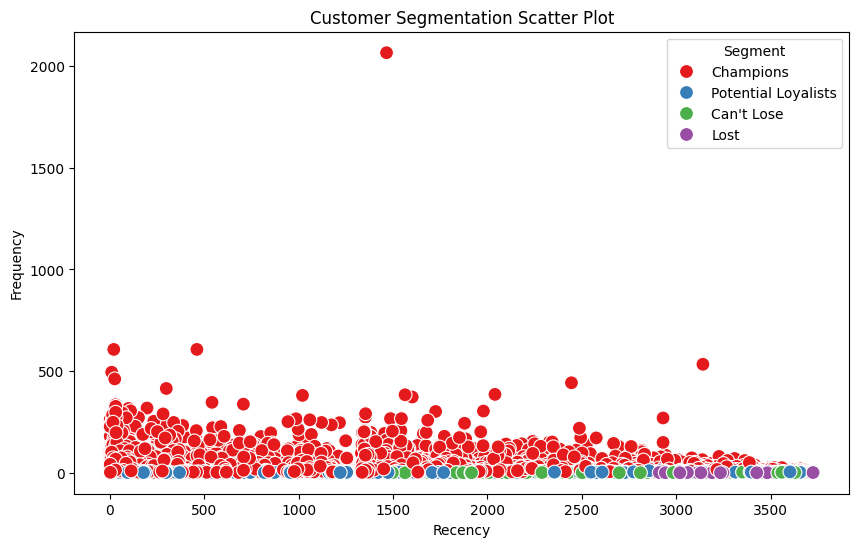

In [54]:
# Create a scatter plot with color-coding for segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Recency',
    y='Frequency',
    hue='RFM Customer Segments',
    data=sales_df,
    palette='Set1',  
    s=100,  
)
plt.title('Customer Segmentation Scatter Plot')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title='Segment', loc='upper right')
plt.show()